# DATOS GOB AR ( OIL AND GAS)



**Producción de petróleo y gas por pozo (Capítulo IV)** https://datos.gob.ar/dataset/energia-produccion-petroleo-gas-por-pozo-capitulo-iv
Secretaría de Energía. Subsecretaría de Planeamiento Energético. Dirección Nacional de Escenarios y Evaluación de Proyectos. Dirección de Información Energética.Tecnología de la Información. 

**Detalle mensual de producción por pozo, yacimiento, concesión y provincia. Petróleo [m3], gas en [Miles de m3] y agua en [m3]**

# **EDA**

**Este es un set de datos muy completo, consta de una gran cantidad de datos, lo que vamos a hacer es un EDA. Si bien los datos estan mes a mes, para hacerlo menos complejo lo voy a hacer año a año**


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [9]:
#Cargo data set oil and gas

df = pd.read_csv("C:\\Users\\Felipe\\Desktop\\Data_Science_Road_2024\\EDA\\Economic_Data_Analysis_Fred\\produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv")

In [10]:
#exploramos las columnas del dataset

df.head(5)



,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,YSUR,2015,1,153521,1.08,259.63,20.28,0.0,0.0,0.0,0.0,31.0,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2015-02-26 13:35:35.533458,f,t,5,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1185,BASA,3353.0,basamento,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.251198,-38.861772,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2015-01-31
1,YSUR,2015,1,136448,2.06,92.68,3.24,0.0,0.0,0.0,0.0,31.0,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2015-02-26 13:35:35.533458,f,t,5,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.RCo-1044(d),PREC,2701.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.202449,-39.081680,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2015-01-31
2,YSUR,2015,1,137602,30.54,558.97,56.90,0.0,0.0,0.0,0.0,31.0,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2015-02-26 13:35:35.533458,f,t,5,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1186(h)(I),BASA,3524.0,basamento,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.245305,-38.853815,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2015-01-31
3,YSUR,2015,1,153660,9.62,0.00,18.59,0.0,0.0,0.0,0.0,2.0,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2015-02-26 13:35:35.533458,f,t,5,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.RCo-1046(d),PREC,3000.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.174582,-39.075801,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2015-01-31
4,YSUR,2015,1,136856,15.14,359.21,20.00,0.0,0.0,0.0,0.0,31.0,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2015-02-26 13:35:35.533458,f,t,5,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.RCo-1052(d),PREC,2801.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.183183,-39.083081,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2015-01-31


In [11]:
print(df.columns,df.shape)

Index(['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo',
       'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
       'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento',
       'areayacimiento', 'cuenca', 'provincia', 'coordenadax', 'coordenaday',
       'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion',
       'sub_tipo_recurso', 'fecha_data'],
      dtype='object') (280075, 40)


In [13]:
df=df[['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua',
      #'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       #'vida_util', 'tipoextraccion', 
      'tipoestado', 'tipopozo',
      # 'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
      # 'idusuario',
      'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 
      'idareayacimiento', 'areayacimiento', 'cuenca', 'provincia', 'coordenadax', 'coordenaday',
       'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion',
       'sub_tipo_recurso', 'fecha_data']].copy()

In [54]:
df = df.dropna(subset=['anio', 'mes'])

df['anio'] = pd.to_numeric(df['anio'], errors='coerce').fillna(0).astype(int)

df['fecha'] = pd.to_datetime(df['anio'].astype(str) + '-' + df['mes'].astype(str))
print(df['fecha'])

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
280070   2023-10-01
280071   2023-11-01
280072   2023-11-01
280073   2023-11-01
280074   2023-11-01
Name: fecha, Length: 271287, dtype: datetime64[ns]


In [53]:
df.isna().sum()

idempresa                   0
anio                        0
mes                         0
idpozo                      0
prod_pet                    0
prod_gas                    0
prod_agua                   0
tipoestado                522
tipopozo                  522
empresa                     0
sigla                       0
formprod                    0
profundidad                 0
formacion                   0
idareapermisoconcesion      0
areapermisoconcesion        0
idareayacimiento            0
areayacimiento              0
cuenca                      0
provincia                   0
coordenadax                 0
coordenaday                 0
tipo_de_recurso             0
proyecto                    0
clasificacion             668
subclasificacion          668
sub_tipo_recurso          324
fecha_data                  0
fecha                       0
dtype: int64

In [17]:
df.loc[df.duplicated(subset=['idpozo'])].head(5)

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,tipoestado,tipopozo,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,fecha
134,YSUR,2016,1,130517,0.00,0.00,0.00,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.RN.EFO.p-47d,LAJA,3800.0,lajas,FEO,ESTACION FERNANDEZ ORO,Z155,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.861967,-39.013706,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31,2016-01-01
135,YSUR,2016,1,131984,14.24,195.57,11.09,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.RN.EFO-95(d),LAJA,3856.0,lajas,FEO,ESTACION FERNANDEZ ORO,Z155,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.874130,-39.011996,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31,2016-01-01
136,YSUR,2016,1,133430,0.00,0.00,0.00,En Estudio,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.RCo.x-2001,PREC,3204.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.193993,-39.078224,NO CONVENCIONAL,GAS PLUS,EXPLORACION,EXPLORACION,TIGHT,2016-01-31,2016-01-01
137,YSUR,2016,1,131068,0.00,0.00,0.00,Parado Transitoriamente,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.RN.EFO-45ST,LAJA,3816.0,lajas,FEO,ESTACION FERNANDEZ ORO,Z155,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.878573,-39.009753,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31,2016-01-01
138,YSUR,2016,1,131429,0.00,0.00,0.00,Parado Transitoriamente,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.RN.EFO.p-25(I)d,LAJA,3800.0,lajas,FEO,ESTACION FERNANDEZ ORO,Z155,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.874105,-39.013103,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31,2016-01-01


**Aca como vemos el dataset consta de 280k de filas por 40 columnas**

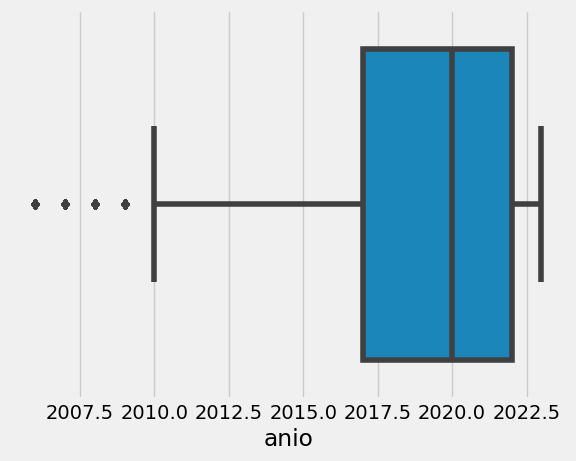

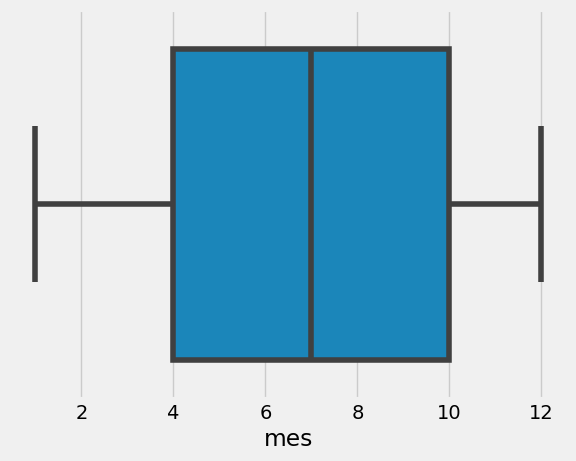

In [19]:

#filtro datos por anios veo los percentiles y decido que lo hago desde 2010 a 2023

# Reemplazar NaN e infinitos con 0
df['anio'] = df['anio'].replace([np.inf, -np.inf, np.nan], 0)


df['anio'] = df['anio'].round().astype(int)


column_list = [ 'anio', 'mes']
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()




2009.5


Text(0, 0.5, 'Cantidad de datos')

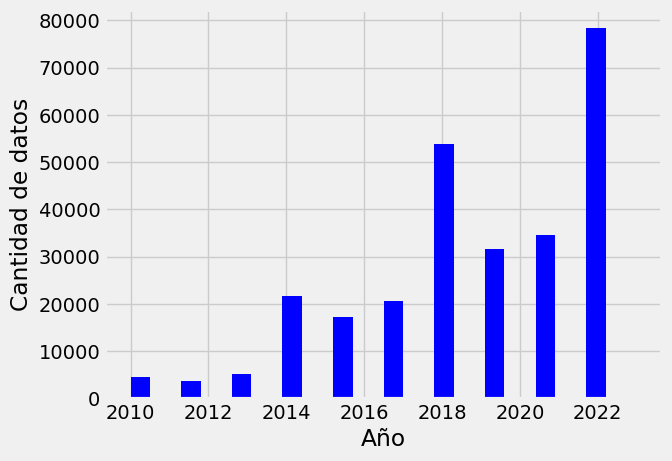

In [20]:
#filtro los años que tienen pocos datos utilizando los rangos itercuartiles



#Calcular el rango intercuartílico (IQR)
Q1 = df['anio'].quantile(0.25)
Q3 = df['anio'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

print(umbral_inferior)

# Filtrar el DataFrame para eliminar outliers
df['anio']=df['anio'][(df['anio'] >= umbral_inferior) & (df['anio'] <= umbral_superior)]

#cantidad de datos por anio

ax = plt.hist(df['anio'], width=0.5, color="blue")
plt.xlabel("Año")
plt.ylabel("Cantidad de datos")

**EN ESTA PARTE LO QUE HAGO ES ITERAR QUEDANDOME CON LAS 3 EMPRESASA QUE MÁS DATOS TIENEN**

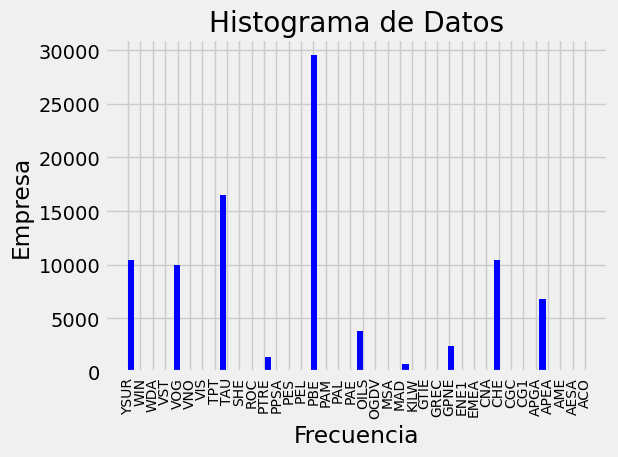

,idempresa
count,92060
unique,38
top,PAL
freq,10844


In [21]:
#descripcion del set

df_idempresa=df[['idempresa']]

df_idempresa_index_0 = df_idempresa.loc[df_idempresa['idempresa'].str.contains('YPF')].index
df_idempresa_index_1 = df_idempresa.loc[df_idempresa['idempresa'].str.contains('APS')].index
df_idempresa_index_2 = df_idempresa.loc[df_idempresa['idempresa'].str.contains('PLU')].index



df_idempresa_index = df_idempresa_index_0.append(df_idempresa_index_1)
df_idempresa_index = df_idempresa_index.append(df_idempresa_index_2)



df_idempresa_sinYPF=df_idempresa.drop(df_idempresa_index)


#df_idempresa= df_idempresa.drop(df_idempresa_index)

#print(df_idempresa_index)

#df_idempresa_index = df_idempresa.drop(df_idempresa_index)


#frecuencia= len(df.idempresa=="YPF")/len(df.id_empresa)

YPF = df.query('idempresa=="YPF" and 2010 <= anio <= 2023')
APS=df.query('idempresa=="APS" and 2010 <= anio <= 2023')
PLU=df.query('idempresa=="PLU" and 2010 <= anio <= 2023')
#print(frecuencia)

#df_idempresa= 

ax =plt.hist(df_idempresa_sinYPF, color='blue',width=.5)

# Ajustar diseño para evitar superposición de etiquetas
plt.title('Histograma de Datos')
plt.xlabel('Frecuencia')
plt.ylabel('Empresa')
plt.grid(True)
plt.xticks(rotation=90, fontsize=10)
# Ajustar la disposición de las etiquetas
plt.tight_layout()

# Mostrar el histograma
plt.show()


df_idempresa_sinYPF.describe()

**CONCATENO PARA ARMAR UN NUEVO DATASET**

In [22]:
df_final=pd.concat([YPF,APS,PLU], ignore_index=True)

df_final = df_final.reset_index(drop=True)


df_final['mes'].round().astype(int)


0          1
1          1
2          1
3          1
4          1
          ..
181760    12
181761    12
181762    12
181763    12
181764    12
Name: mes, Length: 181765, dtype: int32

**AHORA SI GRAFICO LA PRODUCCION DE PETROLEO A LO LARGO DE LOS AÑOS, PARA CADA AÑO**

<Figure size 1200x600 with 0 Axes>

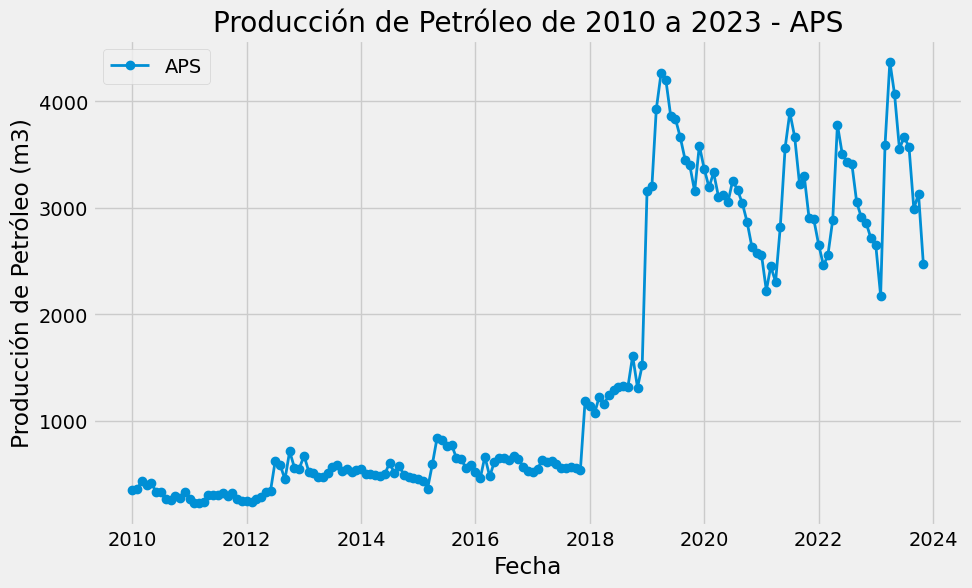

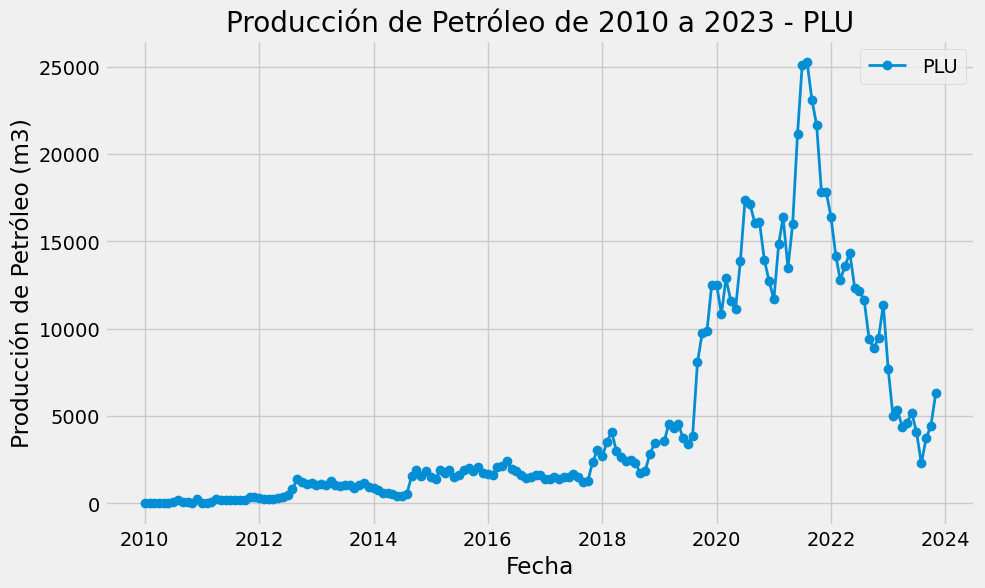

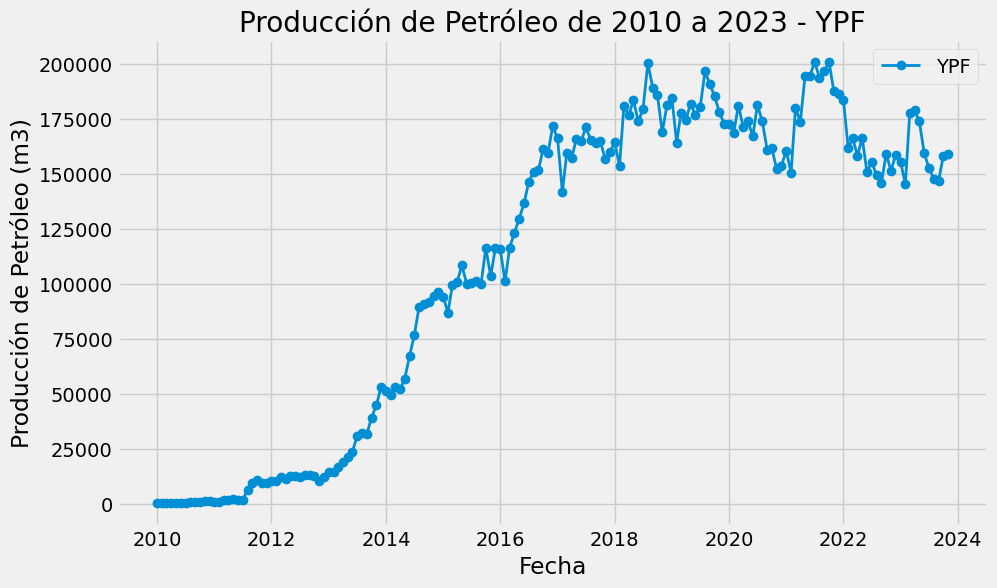

In [56]:
#df_final['fecha'] = pd.to_datetime(df_final['anio'].astype(str) + '-' + df_final['mes'].astype(str))



df_petroleo_por_empresa = df_final.groupby(['idempresa', 'fecha'])['prod_pet'].sum().reset_index()




plt.figure(figsize=(12, 6))


empresas=df_petroleo_por_empresa['idempresa'].unique()

 # Personalizar colores y estilos
    

for empresa in empresas : 
    
    datos_empresa = df_petroleo_por_empresa[df_petroleo_por_empresa['idempresa'] == empresa]
    
    plt.figure(figsize=(10, 6))

    plt.plot(datos_empresa['fecha'], datos_empresa['prod_pet'], label=empresa, marker='o', linestyle='-', linewidth=2)

 # Personalizar el gráfico
    plt.title(f'Producción de Petróleo de 2010 a 2023 - {empresa}')
    plt.xlabel('Fecha')
    plt.ylabel('Producción de Petróleo (m3)')
    plt.legend()
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()

    
#gráfico de barras apiladas    

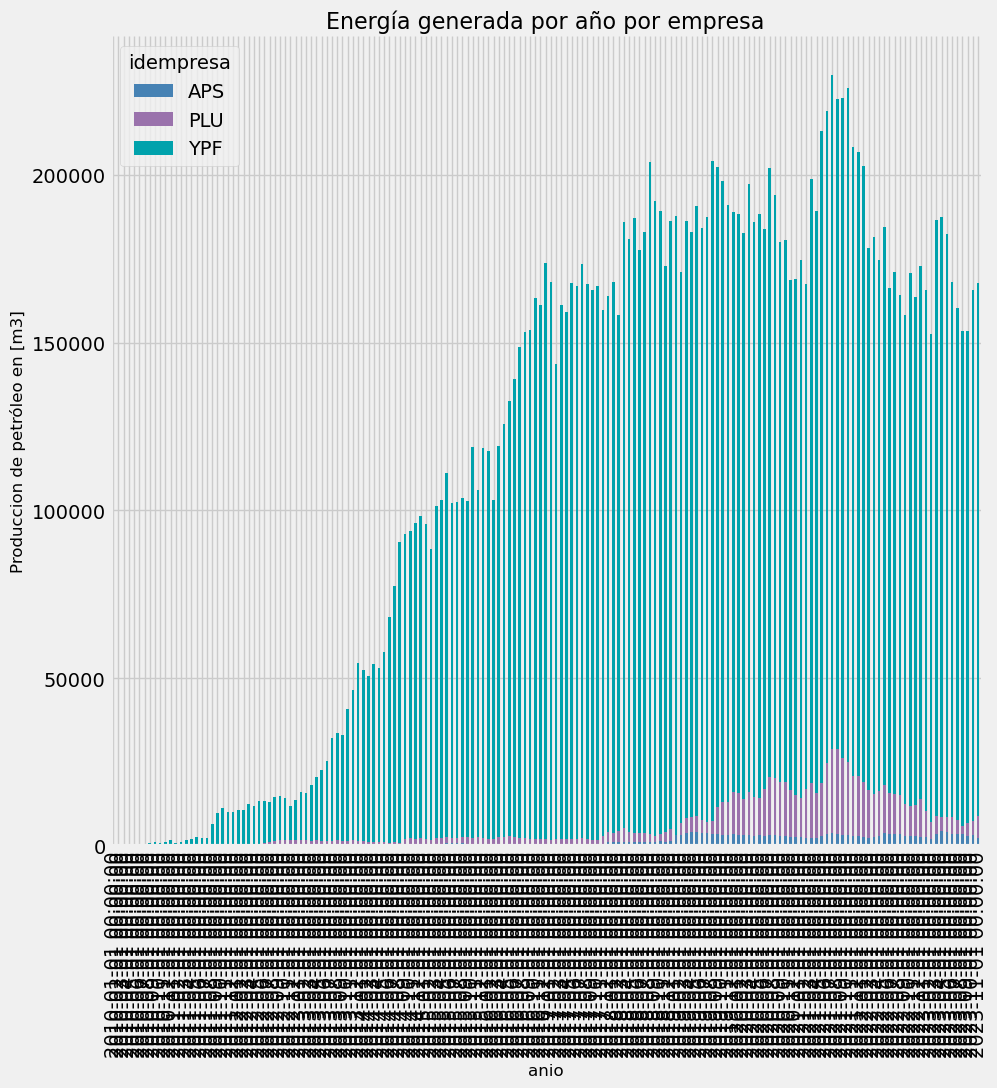

In [74]:
# Cantidad de energía renovable generada por año diferenciada por tipo de fuente de energía

# Filtramos los datos y sumamos
prod_anio = df_final.groupby(['idempresa','fecha'])[['prod_pet']].sum().reset_index()
df_prod_anio = prod_anio.pivot(index='fecha', columns='idempresa', values='prod_pet').fillna(0).reset_index()

# Gráfico de barras apiladas
colores = ['#4682B4','#9A72AC', '#00A2AC','#6495ED', '#20C29A','#B200B2']
df_prod_anio.set_index('fecha').plot(kind='bar', stacked=True, figsize=(10,10), color=colores)
plt.xlabel("anio", fontsize=12)
plt.ylabel("Produccion de petróleo en [m3]", fontsize=12)
plt.title("Energía generada por año por empresa", fontsize=16)
sns.despine()

**ACA LA IDEA SERIA TRABAJAR CON LA PROFUNDIDAD PARA VER COMO VARIA LA PRODUCCION DE PETROLEO CON LA PROFUNDIDAD, PARA ESO ME VOY A SACAR DE ENCIMA LOS OUTLIERS**

In [39]:
#Sacar outliers
# Supongamos que 'df' es tu DataFrame y 'columna_a_analizar' es la columna con los datos
# Asegúrate de tener los nombres de las columnas correctos

# Calcular el rango intercuartílico (IQR)
Q1 = df_final['profundidad'].quantile(0.25)
Q3 = df_final['profundidad'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

print(umbral_superior)

# Filtrar el DataFrame para eliminar outliers
df_final= df_final[(df_final['profundidad'] >= umbral_inferior) & (df_final['profundidad'] <= umbral_superior)]


5269.0


**Y OTRA DE LAS COSAS QUE ME INTERESO HACER FUE VER LOS DATOS POR PROVINCIA, VER COMO ESTAN DISTRIBUIDOS LOS POZOS Y CUALES SON LAS CONSECIONES QUE MÁS PRODUJERON**

array(['Neuquén', 'Mendoza', 'Chubut', 'Rio Negro', 'Santa Cruz'],
      dtype=object)

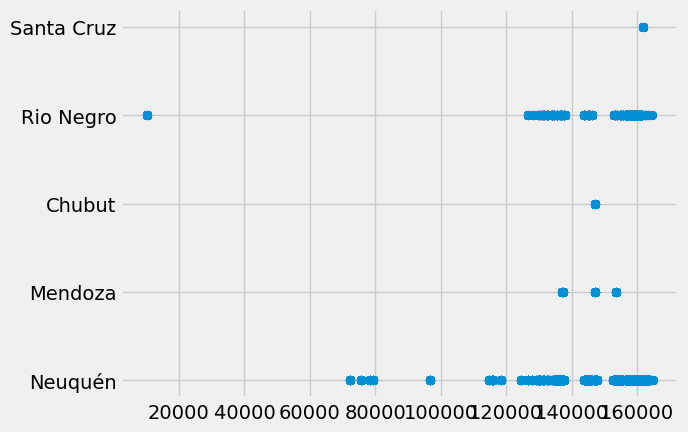

In [14]:
plt.scatter(df_final['idpozo'], df_final['provincia'])

df_final['provincia'].unique()

**ME QUEDO CON NEUQUEN Y RIO NEGRO QUE SON LAS DOS PROVINCIAS QUE REPORTAN MÁS POZOS** 

In [15]:
#pozos y produccion total por pozo

df_final_pozo=df_final.groupby(['idempresa','idpozo'])['prod_pet'].sum()
df_final_pozo.shape

Q1 = df_final_pozo.quantile(0.25)
Q3 = df_final_pozo.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers
df_final_pozo= df_final_pozo[(df_final_pozo>= umbral_inferior) & (df_final_pozo <= umbral_superior)]

print(df_final_pozo)

print(type(df_final_pozo))



idempresa  idpozo
APS        10073     1593.00
           96629     1246.03
           96630      453.58
           96632     1202.36
           96633      913.66
                      ...   
YPF        164793    1766.42
           164801     212.58
           164804     275.05
           164805     511.87
           164815     227.48
Name: prod_pet, Length: 1751, dtype: float64
<class 'pandas.core.series.Series'>


# Neuquen, trabajo con los pozos de neuquén

In [61]:
provincias = gpd.read_file('C:\\Users\\Felipe\\Desktop\\Data_Science_Road_2024\\EDA\\arg.shp')

provincias.head(5)


# Asegurarse de que 'NOM_PROV' sea una columna categórica o de texto
provincias['nam'] = provincias['nam'].astype(str)

# Seleccionar la geometría de la provincia de Neuquén
provincia_neu = provincias[provincias['nam'] == 'Neuquén']

#neuquen_gpd=gpd.GeoDataFrame(provincia_neu)

pozos_neuquen=df_final.query('provincia=="Neuquén"')
#print(pozos_neuquen)


#esto lo hago para plotear los pozos

pozos_sin_duplicados = pozos_neuquen.drop_duplicates(subset=['idpozo'])

print(pozos_sin_duplicados)

       idempresa    anio  mes  idpozo  prod_pet  prod_gas  prod_agua  \
0            YPF  2010.0    1  131288      0.00    26.920      10.93   
1            YPF  2010.0    1  131291      0.00     0.000       0.00   
2            YPF  2010.0    1  130329      0.00    14.750       0.00   
3            YPF  2010.0    1  130465      0.00   942.270      10.03   
4            YPF  2010.0    1  130482      0.00   733.290      29.15   
...          ...     ...  ...     ...       ...       ...        ...   
167898       PLU  2022.0    1  162182    892.82  8467.896     731.82   
167900       PLU  2022.0    1  162183    708.96  6799.701     878.02   
167901       PLU  2022.0    1  162179   3527.49  6633.558    1643.47   
167902       PLU  2022.0    1  162181    651.21  6711.582    1036.00   
180469       PLU  2023.0   11  164776      0.00     0.000       0.00   

                     tipoestado  tipopozo          empresa  \
0           Extracción Efectiva  Gasífero         YPF S.A.   
1       Par

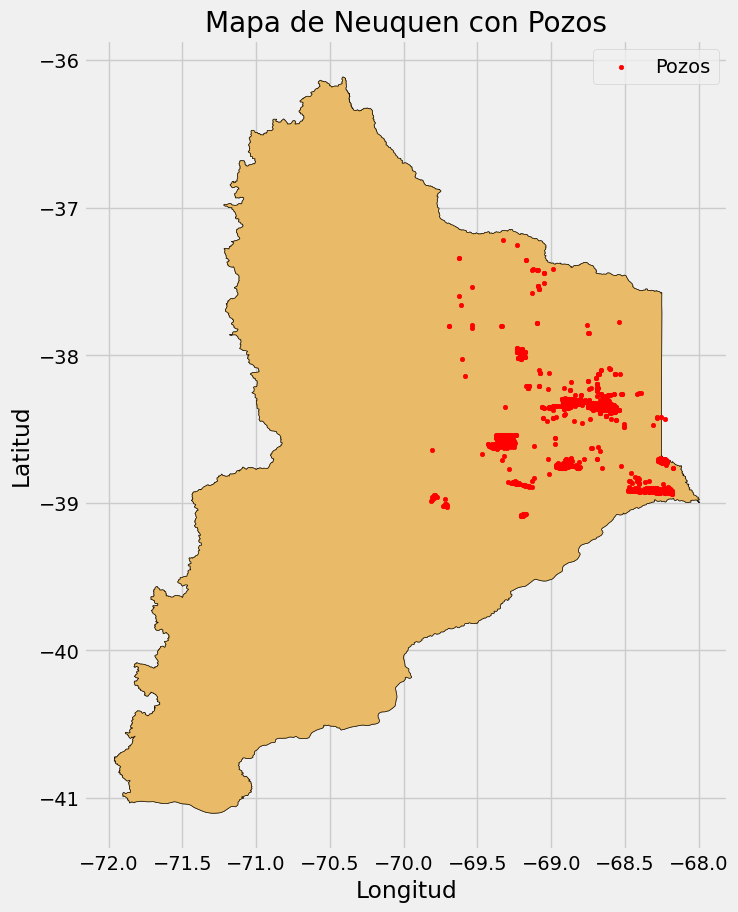

In [62]:


# Convertir las coordenadas de los pozos a un GeoDataFrame
gdf_pozos = gpd.GeoDataFrame(pozos_sin_duplicados, geometry=gpd.points_from_xy(pozos_sin_duplicados['coordenadax'],pozos_sin_duplicados['coordenaday']))



# Graficar el mapa de la provincia de Neuquén
fig, ax = plt.subplots(figsize=(10, 10))
provincia_neu.plot(ax=ax, color='lightgray', edgecolor='black')  # Mapa de provincias
provincia_neu.plot(ax=ax, color='orange', edgecolor='black', alpha=0.5)  # Mapa de Neuquén
gdf_pozos.plot(ax=ax, color='red', markersize=10, label='Pozos')  # Puntos de pozos

# Configuración adicional
ax.set_title('Mapa de la Provincia de Neuquén con Pozos')


# Etiquetar los pozos con sus IDs
#for idx, row in gdf_pozos.iterrows():
 #   ax.text(row['geometry'].x, row['geometry'].y, str(row['idpozo']), fontsize=8, ha='center')
    
    
    # Personalizar el mapa
ax.set_title('Mapa de Neuquen con Pozos')
ax.legend()
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)



In [63]:
#produccion de pozos segun zonas

# Crear un diccionario para almacenar DataFrames separados por área de producción
pozos_por_area = {}

# Iterar sobre cada área de producción y crear un DataFrame separado para cada una
for area, datos_area in pozos_neuquen.groupby('idareayacimiento'):
    pozos_por_area[area] = datos_area.copy()

    

#print(pozos_por_area)

pozos_por_area.keys()

dict_keys(['ACO', 'AGA', 'ANC', 'ANCS', 'AVI', 'BAEO', 'BDCC', 'BDNN', 'BDSS', 'BDTO', 'BGO', 'BTN', 'CAO', 'CAVI', 'CEN', 'CLMI', 'CNES', 'CPAR', 'CSN', 'DAD', 'ECOO', 'ELOR', 'ELSA', 'ETRI', 'FIM', 'GUA', 'LAC', 'LCA', 'LCAM', 'LCLL', 'LCOL', 'LDL', 'LJE', 'LMAN', 'LMOL', 'LOAM', 'LOAS', 'LR', 'LRII', 'LTAC', 'MMN', 'PDYI', 'PNOE', 'PSI', 'PTC2', 'RDM', 'RIPI', 'RNQ', 'RQC', 'Z011', 'Z050', 'Z051', 'Z077', 'Z116', 'Z259', 'Z262', 'Z349', 'Z350'])

**Busco las áreas de yacimiento que más producen y las grafico en el mapa 

LAC: 3312399.01 barriles de petróleo
LCAM: 3986387.75 barriles de petróleo
LCLL: 7631200.94 barriles de petróleo


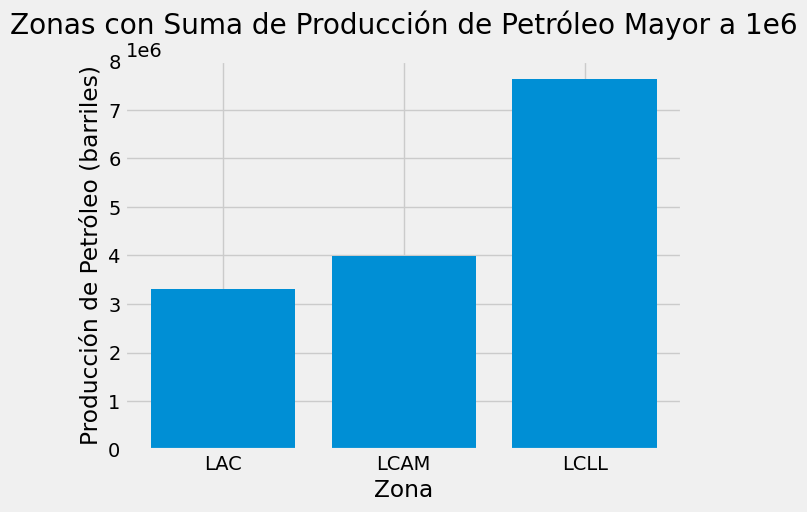

In [64]:
columnas_deseadas = ['idpozo', 'coordenadax', 'coordenaday', 'prod_pet', 'prod_gas']

# Supongamos que diccionario_zonas ya está creado
for codigo, dataframe in pozos_por_area.items():
    df_zona = dataframe[columnas_deseadas].copy()
    pozos_por_area[codigo] = df_zona
    


produccion_petroleo_por_zona = {}

for nombre_zona, dataframe in pozos_por_area.items():
    # Calcular la suma de producción de petróleo por zona
    suma_prod_pet = dataframe['prod_pet'].sum()
    
    # Almacenar la suma en el diccionario
    produccion_petroleo_por_zona[nombre_zona] = suma_prod_pet

# Filtrar las zonas con sumas mayores a 1e6
zonas_filtradas = {nombre_zona: suma_prod_pet for nombre_zona, suma_prod_pet in produccion_petroleo_por_zona.items() if suma_prod_pet > 1e6}

# Mostrar las zonas filtradas y sus sumas de producción de petróleo
for nombre_zona, suma_prod_pet in zonas_filtradas.items():
    print(f"{nombre_zona}: {suma_prod_pet} barriles de petróleo")

# También puedes plotear las zonas filtradas, si es necesario
plt.bar(zonas_filtradas.keys(), zonas_filtradas.values())
plt.title('Zonas con Suma de Producción de Petróleo Mayor a 1e6')
plt.xlabel('Zona')
plt.ylabel('Producción de Petróleo (barriles)')
plt.show()


C:\Users\Felipe\AppData\Local\Temp\ipykernel_15812\3672012166.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab10', len(pozos_por_area_filtrado.keys()))


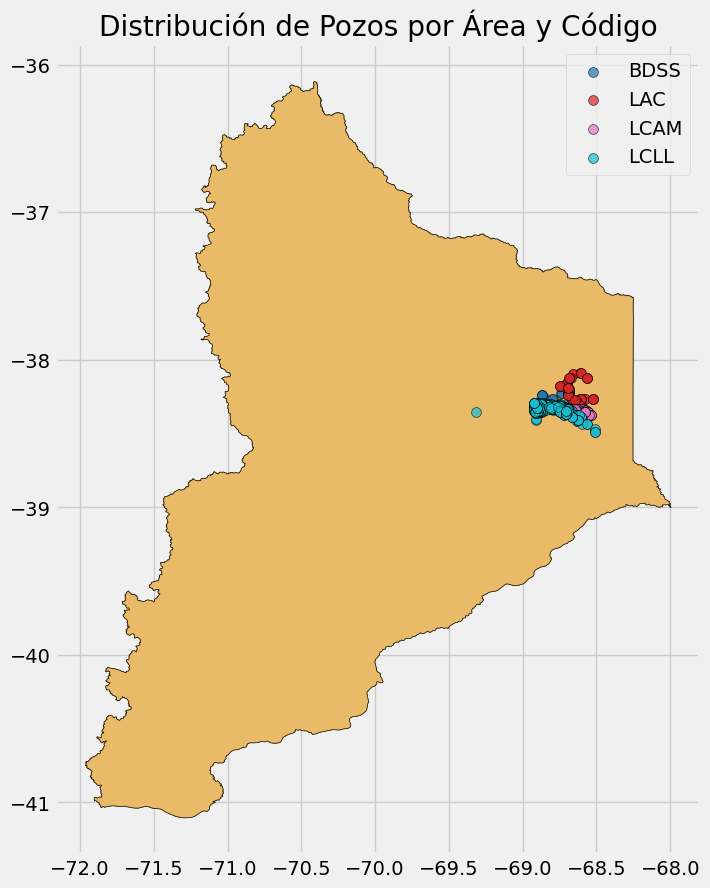

In [65]:
keys_deseadas = ["BDSS", "LAC", "LCAM", "LCLL"]

pozos_por_area_filtrado = {key: value for key, value in pozos_por_area.items() if key in keys_deseadas}
    
        # Graficar los GeoDataFrames en un mismo mapa
fig, ax = plt.subplots(figsize=(10, 10))

provincia_neu.plot(ax=ax, color='lightgray', edgecolor='black')  # Mapa de provincias
provincia_neu.plot(ax=ax, color='orange', edgecolor='black', alpha=0.5)  # Mapa de Neuquén
    
# Obtener colores únicos para cada dataframe
colores = plt.cm.get_cmap('tab10', len(pozos_por_area_filtrado.keys()))

# Plotear los pozos en el mapa con colores diferentes para cada dataframe

for i, (nombre_zona, dataframe) in enumerate(pozos_por_area_filtrado.items()):
    gdf = gpd.GeoDataFrame(dataframe, geometry=gpd.points_from_xy(dataframe['coordenadax'], dataframe['coordenaday']))
    gdf=gdf.drop_duplicates(subset='idpozo')
    color = colores.colors[i % len(colores.colors)]  # Ciclar colores si hay más dataframes que colores disponibles
    gdf.plot(ax=ax, color=color, markersize=50, alpha=0.7, edgecolor='black', label=nombre_zona)
    
# Personalizar el mapa
plt.title('Distribución de Pozos por Área y Código')
plt.legend()
plt.show()

ACO: 12.99 m3 de petroleo
AGA: 108633.4 m3 de petroleo
ANC: 0.45 m3 de petroleo
ANCS: 2.8799999999999994 m3 de petroleo
AVI: 0.0 m3 de petroleo
BAEO: 13992.16 m3 de petroleo
BDCC: 2950.4199999999996 m3 de petroleo
BDNN: 823.02 m3 de petroleo
BDSS: 592575.94 m3 de petroleo
BDTO: 0.0 m3 de petroleo
BGO: 30014.91 m3 de petroleo
BTN: 166184.07 m3 de petroleo
CAO: 38891.42 m3 de petroleo
CAVI: 910.4799999999998 m3 de petroleo
CEN: 124127.350001837 m3 de petroleo
CLMI: 0.0 m3 de petroleo
CNES: 48.58 m3 de petroleo
CPAR: 300.03999999999996 m3 de petroleo
CSN: 80792.01 m3 de petroleo
DAD: 513.22 m3 de petroleo
ECOO: 0.0 m3 de petroleo
ELOR: 34090.93 m3 de petroleo
ELSA: 56403.45999999999 m3 de petroleo
ETRI: 22.11 m3 de petroleo
FIM: 27233.44 m3 de petroleo
GUA: 18920.6 m3 de petroleo
LAC: 3312399.01 m3 de petroleo
LCA: 609537.805 m3 de petroleo
LCAM: 3986387.75 m3 de petroleo
LCLL: 7631200.94 m3 de petroleo
LCOL: 46061.28999999999 m3 de petroleo
LDL: 14523.45 m3 de petroleo
LJE: 15407.5600000

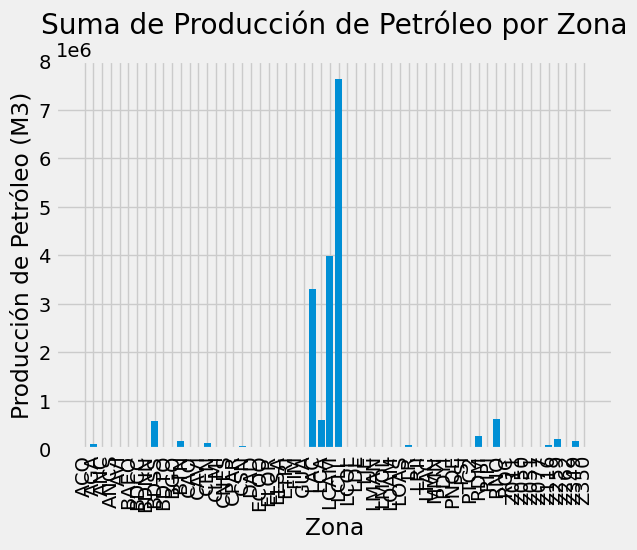

In [66]:
# Inicializar un diccionario para almacenar las sumas de producción de petróleo por zona
produccion_petroleo_por_zona = {}



for nombre_zona, dataframe in pozos_por_area.items():
    # Calcular la suma de producción de petróleo por zona
    suma_prod_pet = dataframe['prod_pet'].sum()
    
    # Almacenar la suma en el diccionario
    produccion_petroleo_por_zona[nombre_zona] = suma_prod_pet

# Mostrar las sumas de producción de petróleo por zona
for nombre_zona, suma_prod_pet in produccion_petroleo_por_zona.items():
    print(f"{nombre_zona}: {suma_prod_pet} m3 de petroleo")

# También puedes plotear las sumas de producción por zona, si es necesario
plt.bar(produccion_petroleo_por_zona.keys(), produccion_petroleo_por_zona.values())
plt.title('Suma de Producción de Petróleo por Zona')
plt.xlabel('Zona')
plt.xticks(rotation=90)
plt.ylabel('Producción de Petróleo (M3)')
plt.show()

**POR ULTIMO GRAFICO LA PRODUCCION DE PETROLEO Y GAS EN FUNCION DE LOS AÑOS Y LAS PRODUCCION DE PETROLEO EN FUNCION DE LA PROFUNDIDAD

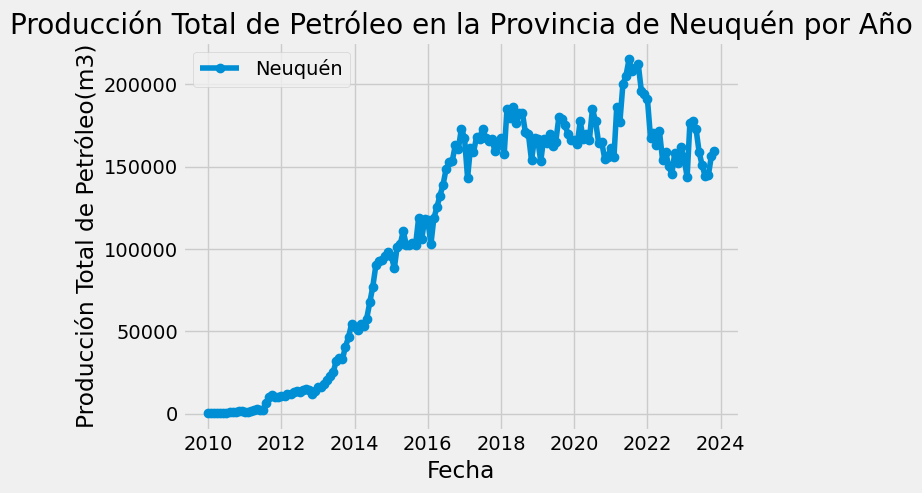

In [67]:
estadisticas_prod_pet= pozos_neuquen.groupby(['provincia','fecha'])['prod_pet'].sum()
estadisticas_prod_gas= pozos_neuquen.groupby(['provincia','fecha'])['prod_gas'].sum()
estadisticas_profundidad = pozos_neuquen.groupby(['provincia','profundidad'])['prod_pet'].sum()



# Convertir la Serie a DataFrame
df_prod_pet = estadisticas_prod_pet.reset_index(name='Produccion_Total_Petroleo')

# Graficar la producción total de petróleo por año para la provincia de Neuquén
plt.plot(df_prod_pet['fecha'], df_prod_pet['Produccion_Total_Petroleo'], marker='o', label='Neuquén')

# Personalizar el gráfico
plt.title('Producción Total de Petróleo en la Provincia de Neuquén por Año')
plt.xlabel('Fecha')
plt.ylabel('Producción Total de Petróleo(m3)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

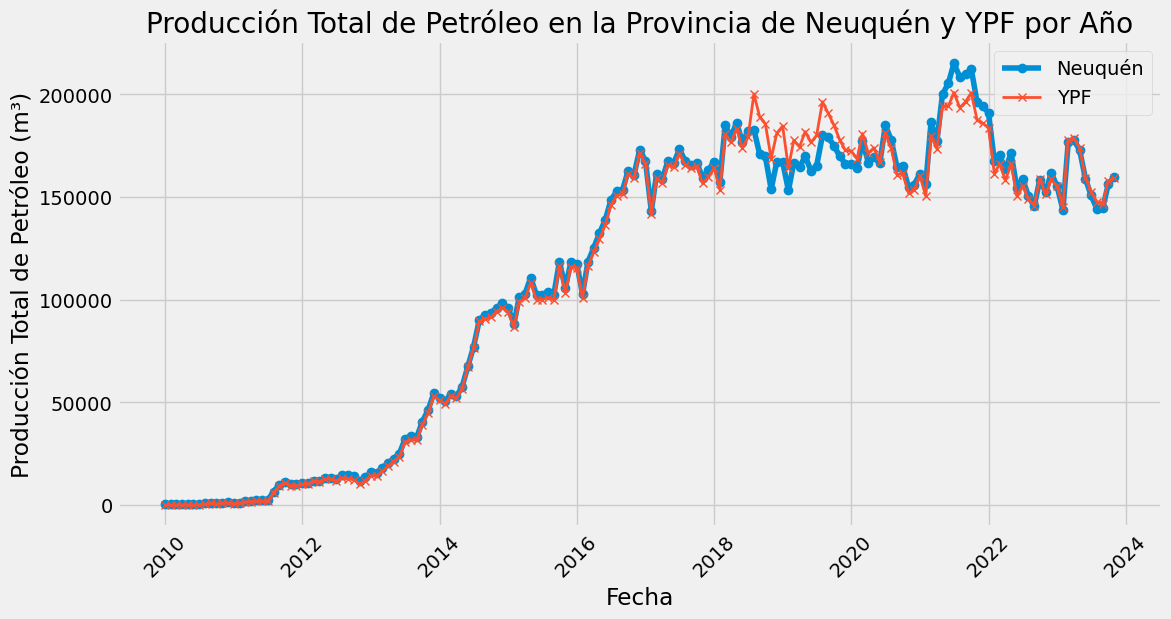

In [82]:


datos_empresa_ypf = df_petroleo_por_empresa[df_petroleo_por_empresa['idempresa'] == 'YPF']

plt.figure(figsize=(12, 6))



# Graficar la producción total de petróleo para la provincia de Neuquén
plt.plot(df_prod_pet['fecha'], df_prod_pet['Produccion_Total_Petroleo'], marker='o', label='Neuquén')

# Graficar la producción de petróleo de YPF
plt.plot(datos_empresa_ypf['fecha'], datos_empresa_ypf['prod_pet'], label='YPF', marker='x', linestyle='-', linewidth=2)

# Personalizar el gráfico
plt.title('Producción Total de Petróleo en la Provincia de Neuquén y YPF por Año')
plt.xlabel('Fecha')
plt.ylabel('Producción Total de Petróleo (m³)')
plt.legend()
plt.grid(True)


# Rotar etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

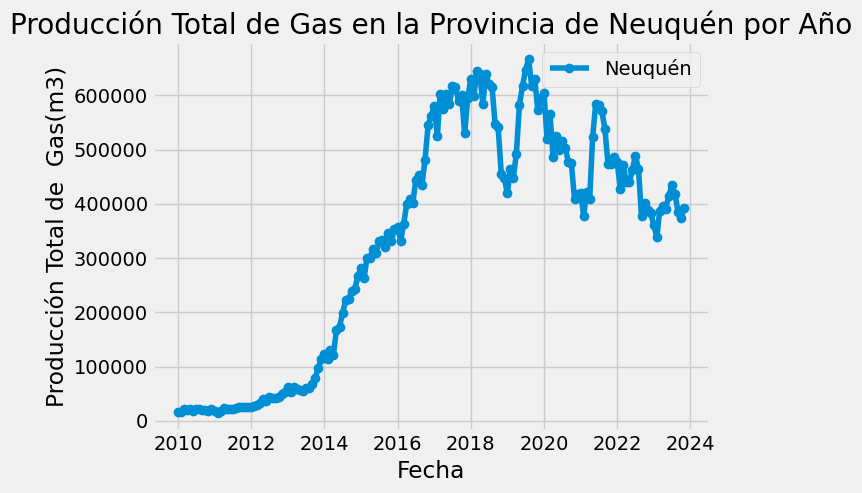

In [68]:
# Convertir la Serie a DataFrame
df_prod_gas = estadisticas_prod_gas.reset_index(name='Produccion_Total_Gas')


# Graficar la producción total de petróleo por año para la provincia de Neuquén
plt.plot(df_prod_gas['fecha'], df_prod_gas['Produccion_Total_Gas'], marker='o', label='Neuquén')

# Personalizar el gráfico
plt.title('Producción Total de Gas en la Provincia de Neuquén por Año')
plt.xlabel('Fecha')
plt.ylabel('Producción Total de  Gas(m3)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

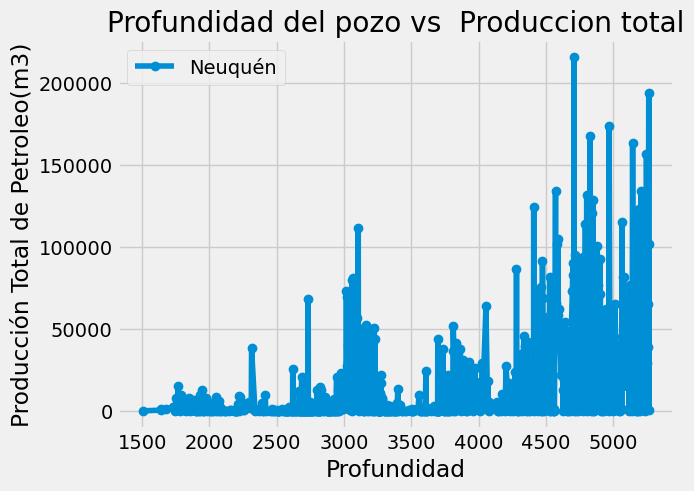

In [69]:
df_prod_pet_prof=estadisticas_profundidad.reset_index(name='Produccion_Total_pet')



# Graficar la producción total de petróleo por año para la provincia de Neuquén
plt.plot(df_prod_pet_prof['profundidad'], df_prod_pet_prof['Produccion_Total_pet'], marker='o', label='Neuquén')

# Personalizar el gráfico
plt.title('Profundidad del pozo vs  Produccion total')
plt.xlabel('Profundidad')
plt.ylabel('Producción Total de Petroleo(m3)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

**Lo mismo se puede hacer para Rio Negro**

In [77]:

# Asegurarse de que 'NOM_PROV' sea una columna categórica o de texto
provincias['nam'] = provincias['nam'].astype(str)

# Seleccionar la geometría de la provincia de Neuquén
provincia_rn = provincias[provincias['nam'] == 'Río Negro']

#print(provincia_rn)
#neuquen_gpd=gpd.GeoDataFrame(provincia_neu)

pozos_rn=df_final.query('provincia=="Rio Negro"')
#print(pozos_neuquen)

pozos_sin_duplicados_rn = pozos_rn.drop_duplicates(subset=['idpozo'])


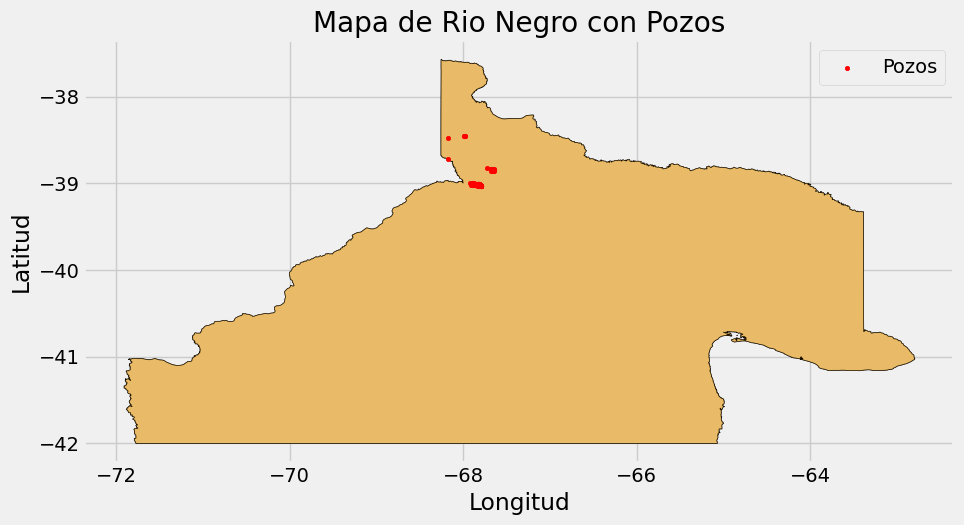

In [78]:
# Convertir las coordenadas de los pozos a un GeoDataFrame
gdf_pozos = gpd.GeoDataFrame(pozos_sin_duplicados_rn, geometry=gpd.points_from_xy(pozos_sin_duplicados_rn['coordenadax'],pozos_sin_duplicados_rn['coordenaday']))



# Graficar el mapa de la provincia de Neuquén
fig, ax = plt.subplots(figsize=(10, 10))
provincia_rn.plot(ax=ax, color='lightgray', edgecolor='black')  # Mapa de provincias
provincia_rn.plot(ax=ax, color='orange', edgecolor='black', alpha=0.5)  # Mapa de Neuquén
gdf_pozos.plot(ax=ax, color='red', markersize=10, label='Pozos')  # Puntos de pozos

# Configuración adicional
ax.set_title('Mapa de la Provincia de Rio Negro con Pozos')


# Etiquetar los pozos con sus IDs
#for idx, row in gdf_pozos.iterrows():
 #   ax.text(row['geometry'].x, row['geometry'].y, str(row['idpozo']), fontsize=8, ha='center')
    
    
    # Personalizar el mapa
ax.set_title('Mapa de Rio Negro con Pozos')
ax.legend()
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)



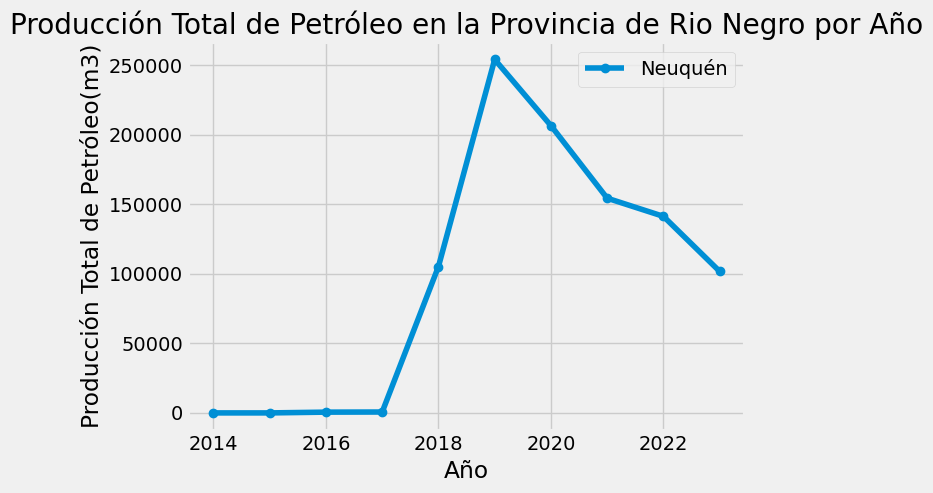

In [79]:
estadisticas_prod_pet= pozos_rn.groupby(['provincia','anio'])['prod_pet'].sum()
estadisticas_prod_gas= pozos_rn.groupby(['provincia','anio'])['prod_gas'].sum()
estadisticas_profundidad = pozos_rn.groupby(['provincia'])['profundidad']



# Convertir la Serie a DataFrame
df_prod_pet = estadisticas_prod_pet.reset_index(name='Produccion_Total_Petroleo')

# Graficar la producción total de petróleo por año para la provincia de Neuquén
plt.plot(df_prod_pet['anio'], df_prod_pet['Produccion_Total_Petroleo'], marker='o', label='Neuquén')

# Personalizar el gráfico
plt.title('Producción Total de Petróleo en la Provincia de Rio Negro por Año')
plt.xlabel('Año')
plt.ylabel('Producción Total de Petróleo(m3)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [80]:
#TIPOS DE POZO
neuquen=pozos_neuquen.groupby(['idpozo','tipoextraccion', 'tipoestado', 'tipopozo','tipo_de_recurso', 'clasificacion' ,'subclasificacion'])['prod_pet'].sum()


neuquen.head(100)

idpozo  tipoextraccion     tipoestado               tipopozo   tipo_de_recurso  clasificacion  subclasificacion     
72206   Surgencia Natural  En Espera de Reparación  Otro tipo  NO CONVENCIONAL  EXPLORACION    EXPLORATORIO PROFUNDO      0.00
                           Extracción Efectiva      Gasífero   NO CONVENCIONAL  EXPLORACION    EXPLORATORIO PROFUNDO    244.77
                           Parado Transitoriamente  Gasífero   NO CONVENCIONAL  EXPLORACION    EXPLORATORIO PROFUNDO      0.00
72228   Plunger Lift       Extracción Efectiva      Gasífero   NO CONVENCIONAL  EXPLOTACION    DESARROLLO                 5.24
        Surgencia Natural  Extracción Efectiva      Gasífero   NO CONVENCIONAL  EXPLOTACION    DESARROLLO               327.70
                                                                                                                         ...  
114888  Surgencia Natural  Parado Transitoriamente  Gasífero   NO CONVENCIONAL  EXPLORACION    EXTENSION                 

In [84]:
df_prod_pet.to_csv('serie_tiempo_neuquen.csv', header=True)
df_final.to_csv('df_final.csv',header=True)